In [3]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
print("\n\nExercise: train a LinearSVC on a linearly separable dataset. "
      "Then train an SVC and a SGDClassifier on the same dataset. "
      "See if you can get them to produce roughly the same model.\n")
print("\nLet's use the Iris dataset: " 
      "the Iris Setosa and Iris Versicolor classes are linearly separable.\n")

from sklearn import datasets
iris = datasets.load_iris()

X = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y==0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5 
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss='hinge',C=C,random_state=42)
svm_clf = SVC(kernel='linear',C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0=0.001, tol=1e-3,alpha=alpha,
                       max_iter=1000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled,y)
svm_clf.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)
#2017250045 정태환
print('LinearSVC :',lin_clf.intercept_,lin_clf.coef_)
print('SVC :',svm_clf.intercept_,svm_clf.coef_)
print('SGDClassifier :',sgd_clf.intercept_,sgd_clf.coef_)



Exercise: train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.


Let's use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.

LinearSVC : [0.28475098] [[1.05364854 1.09903804]]
SVC : [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier : [0.117] [[0.77714169 0.72981762]]


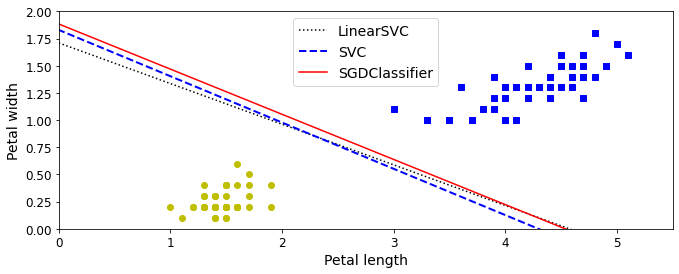

In [4]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

line1 = scaler.inverse_transform([[-10,-10*w1+b1],[10,10*w1+b1]])
line2 = scaler.inverse_transform([[-10,-10*w2+b2],[10,10*w2+b2]])
line3 = scaler.inverse_transform([[-10,-10*w3+b3],[10,10*w3+b3]])


plt.figure(figsize=(11,4))
plt.plot(line1[:,0], line1[:,1], "k:",label="LinearSVC")
plt.plot(line2[:,0],line2[:,1],"b--",linewidth=2,label="SVC")
plt.plot(line3[:,0],line3[:,1],'r-',label="SGDClassifier")

plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo')

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width",fontsize=14)
plt.legend(loc='upper center',fontsize=14)
plt.axis([0,5.5,0,2])
plt.show()
#2017250045 정태환
